In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.model_selection import cross_val_score
import pandas as pd

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#importing the data 
pb_investor_info = pd.read_csv('/content/drive/My Drive/pb_data/investor_info.csv', encoding= 'unicode_escape')
pb_investor_info.columns


pb_investor_info['last_investment_type'] = pd.to_numeric(pb_investor_info['last_investment_type'], errors='coerce')
pb_investor_info['last_investment_class'] = pd.to_numeric(pb_investor_info['last_investment_class'], errors='coerce')
pb_investor_info['primary_investor_type'] = pd.to_numeric(pb_investor_info['primary_investor_type'], errors='coerce')

pb_investor_info['investor_id'] = pb_investor_info['investor_id'].astype(float)
pb_investor_info['total_funds_open'] = pb_investor_info['total_funds_open'].astype(float)
pb_investor_info['total_funds_closed'] = pb_investor_info['total_funds_closed'].astype(float)
pb_investor_info['AUM'] = pb_investor_info['AUM'].astype(float)
pb_investor_info['dry_powder'] = pb_investor_info['dry_powder'].astype(float)
pb_investor_info['last_investment_valuation'] = pb_investor_info['last_investment_valuation'].astype(float)
pb_investor_info['last_investment_size'] = pb_investor_info['last_investment_size'].astype(float)

pb_investor_info['investments_last_5_yrs'] = pb_investor_info['investments_last_5_yrs'].astype(float)
pb_investor_info['investments_last_2_yrs'] = pb_investor_info['investments_last_2_yrs'].astype(float)
pb_investor_info['last_investment_class'] = pb_investor_info['last_investment_class'].astype(float)
pb_investor_info['last_investment_valuation'] = pb_investor_info['last_investment_valuation'].astype(float)
pb_investor_info['last_investment_size'] = pb_investor_info['last_investment_size'].astype(float)


pb_investor_id = pd.read_csv('/content/drive/My Drive/pb_data/investor_id.csv')
pb_investor_id.columns

pb_lp_info = pd.read_csv('/content/drive/My Drive/pb_data/lp_info.csv')
pb_lp_info.columns

pb_lp_id = pd.read_csv('/content/drive/My Drive/pb_data/lp_id.csv')
pb_lp_id.columns

pb_investor_lp = pd.read_csv('/content/drive/My Drive/pb_data/investor_lp.csv')
pb_investor_lp.columns

pb_investor_info.fillna(0,inplace=True)
pb_lp_info.fillna(0, inplace=True)

pb_lp_info.columns
pb_lp_info.dtypes

pb_lp_info['limited_partner_type'] = pd.to_numeric(pb_lp_info['limited_partner_type'], errors='coerce')
pb_lp_info['limited_partner_type'] = pb_lp_info['limited_partner_type'].astype(float)

pb_lp_info = pd.read_csv('/content/drive/My Drive/pb_data/lp_info.csv', encoding= 'unicode_escape')
pb_lp_info.columns
pb_lp_info.dtypes

pb_lp_info.fillna(0, inplace=True)

In [7]:
#clustering analysis
!pip install --upgrade kneed
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [8]:
#clustering for lp
scaler = StandardScaler()
features_lp = pb_lp_info[['total_cmmt_in_vc_funds',
        'AUM',]]
scaled_features_lp = scaler.fit_transform(features_lp)

In [9]:
kmeans = KMeans(
       init="random",
       n_clusters=3,
        n_init=10,
        max_iter=300,
        random_state=42
    )

In [10]:
kmeans.fit(scaled_features_lp)

KMeans(init='random', n_clusters=3, random_state=42)

In [11]:
kmeans.inertia_

413.44912456519705

In [12]:
kmeans.cluster_centers_

array([[-1.86996114e-01, -1.32391553e-01],
       [-5.54662836e-03,  6.34086231e+00],
       [ 2.99898103e+00,  8.32162814e-03]])

In [13]:
kmeans.n_iter_

18

In [14]:
kmeans_kwargs_lp = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs_lp)
    kmeans.fit(scaled_features_lp)
    sse.append(kmeans.inertia_)

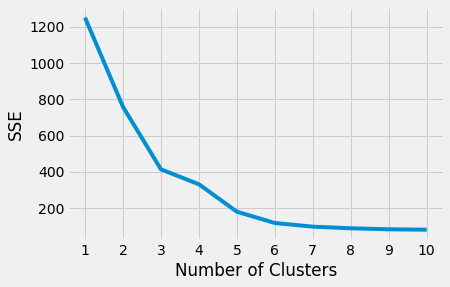

In [15]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 11), sse)
 plt.xticks(range(1, 11))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()

In [16]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

5

In [17]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs_lp)
    kmeans.fit(scaled_features_lp)
    score = silhouette_score(scaled_features_lp, kmeans.labels_)
    silhouette_coefficients.append(score)

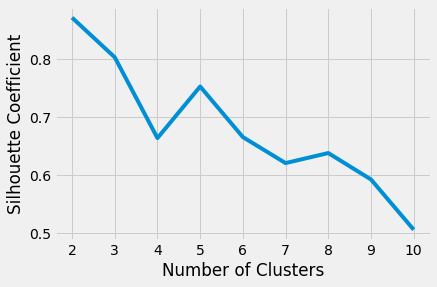

In [18]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [19]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

In [33]:
features = pb_lp_info[['total_cmmt_in_vc_funds',
        'AUM',]]
scaled_features = scaler.fit_transform(features)

In [34]:
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(
    scaled_features, kmeans.labels_
).round(2)
dbscan_silhouette = silhouette_score(
   scaled_features, dbscan.labels_
).round (2)

In [35]:
 kmeans_silhouette

0.89

In [36]:
dbscan_silhouette

0.82

KeyError: ignored

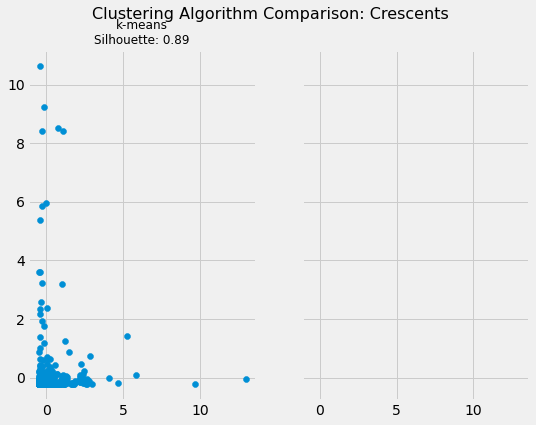

In [37]:
# Plot the data and cluster silhouette comparison
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(8, 6), sharex=True, sharey=True
)
fig.suptitle(f"Clustering Algorithm Comparison: Crescents", fontsize=16)
fte_colors = {
    0: "#008fd5",
    1: "#fc4f30",
}
# The k-means plot
km_colors = [fte_colors[label] for label in kmeans.labels_]
ax1.scatter(scaled_features_lp[:, 0], scaled_features_lp[:, 1])
ax1.set_title(
    f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12}
)

# The dbscan plot
db_colors = [fte_colors[label] for label in dbscan.labels_]
ax2.scatter(scaled_features_lp[:, 0], scaled_features_lp[:, 1])
ax2.set_title(
    f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12}
)
plt.show()

In [38]:
x = pb_lp_info[['total_cmmt_in_vc_funds',
        'AUM',]]

In [39]:
kmeans_lp= KMeans(5)
kmeans_lp.fit(x)

KMeans(n_clusters=5)

In [40]:
identified_clusters = kmeans_lp.fit_predict(x)
identified_clusters

array([0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 3, 0, 4, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0,
       0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0,
       0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 4, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 0, 0, 4, 2, 0, 0, 0, 0, 0,
       0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,